In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
df = load_iris(as_frame=True)

In [4]:
df = pd.DataFrame(df['frame'])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### TO-DO
* SVM, Linear, OVR
* SVM, Linear, OVO
* SVM, RBF, OVR
* SVM, Poly(d=3), OVR

In [11]:
OneVsRestClassifier?

Object `OneVsRestClassifier` not found.


In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

#### MODEL 1: SVM, Linear, OVR

In [16]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

# By default the Sci-Kit Learn library provides a OVO classifier
# when we use SVM Classifier. But I am going to use the one 
# from sklearn multiclass.

model = SVC(kernel='linear')
ovr_svm = OneVsRestClassifier(model)
ovr_svm.fit(df.drop('target', axis=1), df.target)
ovr_svm.score(df.drop('target', axis=1), df.target)

0.96

#### MODEL 2: SVM, Linear, OVO

In [30]:
model = SVC(kernel='linear')
ovo_svm = OneVsOneClassifier(model)
ovo_svm.fit(df.drop('target', axis=1), df.target)
ovo_svm.score(df.drop('target', axis=1), df.target)

0.9933333333333333

#### MODEL 3: SVM, RBF, OVR

In [22]:
model = SVC(kernel='rbf')
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(df.drop('target', axis=1), df.target)
ovr_svm.score(df.drop('target', axis=1), df.target)

0.9733333333333334

#### MODEL 4: SVM, Poly(d=3), OVR

In [25]:
model = SVC(kernel='poly', degree=3)
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(df.drop('target', axis=1), df.target)
ovr_svm.score(df.drop('target', axis=1), df.target)

0.9866666666666667

## Plotting

In [423]:
X = iris.data[:, 2:]

#### MODEL 1: SVM, Linear, OVR

One Vs Rest score is: 0.9266666666666666


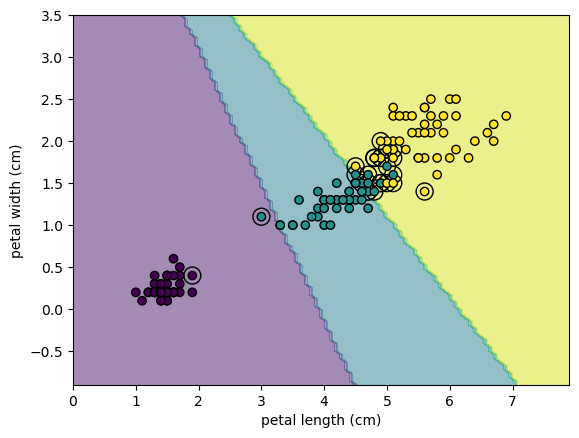

In [452]:
model = SVC(kernel='linear')
model.fit(X, iris.target)
ovr_svm = OneVsRestClassifier(model)
ovr_svm.fit(X, iris.target)
ovr_score = ovr_svm.score(X, iris.target)
print(f'One Vs Rest score is: {ovr_score}')

disp = DecisionBoundaryDisplay.from_estimator(
    ovr_svm, X, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],
    alpha=0.5,
)

petal_length = ovr_svm.estimator.support_vectors_[:, 0]
petal_width = ovr_svm.estimator.support_vectors_[:, 1]

disp.ax_.scatter(len, wid, s=150, facecolors="none", label=wid, edgecolors="k")
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

#### MODEL 2: SVM, Linear, OVO

One Vs Rest score is: 0.9666666666666667


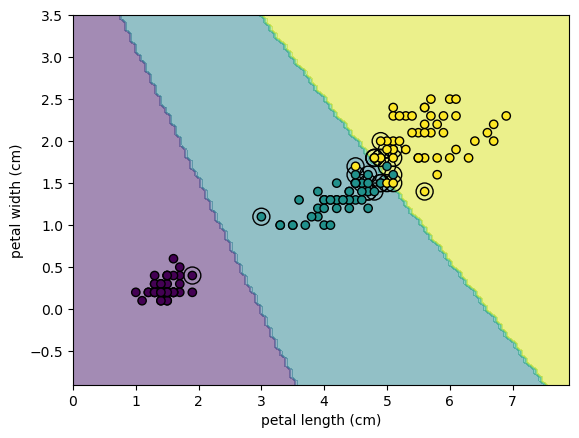

In [450]:
model = SVC(kernel='linear')
model.fit(X, iris.target)
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(X, iris.target)
ovr_score = ovr_svm.score(X, iris.target)
print(f'One Vs Rest score is: {ovr_score}')

disp = DecisionBoundaryDisplay.from_estimator(
    ovr_svm, X, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],
    alpha=0.5,
)

petal_length = ovr_svm.estimator.support_vectors_[:, 0]
petal_width = ovr_svm.estimator.support_vectors_[:, 1]

disp.ax_.scatter(len, wid, s=150, facecolors="none", label=wid, edgecolors="k")
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

#### MODEL 3: SVM, RBF, OVR

One Vs Rest score is: 0.96


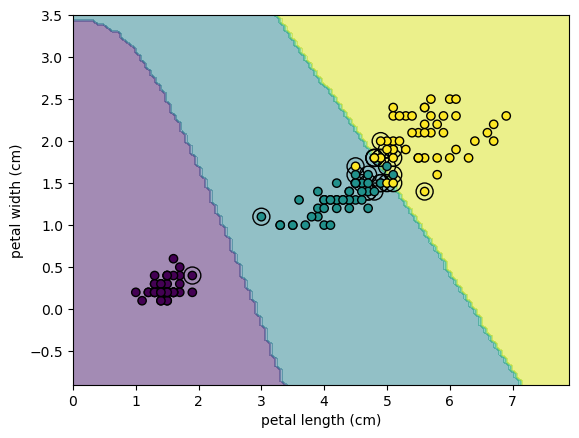

In [454]:
model = SVC(kernel='rbf')
model.fit(X, iris.target)
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(X, iris.target)
ovr_score = ovr_svm.score(X, iris.target)
print(f'One Vs Rest score is: {ovr_score}')

disp = DecisionBoundaryDisplay.from_estimator(
    ovr_svm, X, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],
    alpha=0.5,
)

petal_length = ovr_svm.estimator.support_vectors_[:, 0]
petal_width = ovr_svm.estimator.support_vectors_[:, 1]

disp.ax_.scatter(len, wid, s=150, facecolors="none", label=wid, edgecolors="k")
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

#### MODEL 4: SVM, Poly(d=3), OVR

One Vs Rest score is: 0.9666666666666667


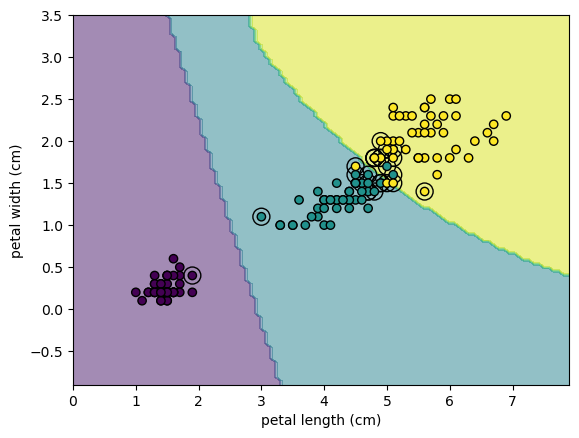

In [456]:
model = SVC(kernel='poly', degree=3)
model.fit(X, iris.target)
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(X, iris.target)
ovr_score = ovr_svm.score(X, iris.target)
print(f'One Vs Rest score is: {ovr_score}')

disp = DecisionBoundaryDisplay.from_estimator(
    ovr_svm, X, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],
    alpha=0.5,
)

petal_length = ovr_svm.estimator.support_vectors_[:, 0]
petal_width = ovr_svm.estimator.support_vectors_[:, 1]

disp.ax_.scatter(len, wid, s=150, facecolors="none", label=wid, edgecolors="k")
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()